# IPL Data Visualization

### Importing Modules

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import re
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = "svg"
# pio.renderers.default = "jupyter"  For interactive plots uncomment this and comment the above code


### Reading and Cleaning the data

In [58]:
ipl = pd.read_csv('IPL_Data.csv')
ipl.head()

,Name,Team,Url,Type,ValueinCR,Full Name,Born,Age,National Side,Batting Style,...,Maidens,RunsConceded,Wickets,Best,3s,5s,BowlingAVG,EconomyRate,S/R,Mtc
0,Mayank Agarwal,PBKS,https://sports.ndtv.com/cricket/players/1430-m...,Batsman,12.00,Mayank Anurag Agarwal,"February 16, 1991 Bangalore, Karnataka","31 Years, 0 Months, 28 Days",India,Right Handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Liam Livingstone,PBKS,https://sports.ndtv.com/cricket/players/64363-...,All-Rounder,11.50,Liam Stephen Livingstone,"August 4, 1993 Barrow-in-Furness, Cumberland","28 Years, 7 Months, 11 Days",England,Right Handed,...,0.0,13.0,0.0,0/13 v MI,0.0,0.0,NaN,13.00,NaN,1.0
2,Kagiso Rabada,PBKS,https://sports.ndtv.com/cricket/players/64042-...,Bowler,9.25,Kagiso Rabada,"May 25, 1995 Johannesburg","26 Years, 9 Months, 22 Days",South Africa,Left Handed,...,2.0,1560.0,76.0,4/21 v RCB,4.0,0.0,20.52,8.21,15.0,50.0
3,Shahrukh Khan,PBKS,https://sports.ndtv.com/cricket/players/113433...,All-Rounder,9.00,Masood Shahrukh Khan,"May 27, 1995 Chennai, Tamil Nadu","26 Years, 9 Months, 20 Days",India,Right Handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Shikhar Dhawan,PBKS,https://sports.ndtv.com/cricket/players/737-sh...,Batsman,8.25,Shikhar Dhawan,"December 5, 1985 Delhi","36 Years, 3 Months, 10 Days",India,Left Handed,...,0.0,66.0,4.0,1/7 v DC,0.0,0.0,16.50,8.25,12.0,6.0


In [59]:
ipl.head()

,Name,Team,Url,Type,ValueinCR,Full Name,Born,Age,National Side,Batting Style,...,Maidens,RunsConceded,Wickets,Best,3s,5s,BowlingAVG,EconomyRate,S/R,Mtc
0,Mayank Agarwal,PBKS,https://sports.ndtv.com/cricket/players/1430-m...,Batsman,12.00,Mayank Anurag Agarwal,"February 16, 1991 Bangalore, Karnataka","31 Years, 0 Months, 28 Days",India,Right Handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Liam Livingstone,PBKS,https://sports.ndtv.com/cricket/players/64363-...,All-Rounder,11.50,Liam Stephen Livingstone,"August 4, 1993 Barrow-in-Furness, Cumberland","28 Years, 7 Months, 11 Days",England,Right Handed,...,0.0,13.0,0.0,0/13 v MI,0.0,0.0,NaN,13.00,NaN,1.0
2,Kagiso Rabada,PBKS,https://sports.ndtv.com/cricket/players/64042-...,Bowler,9.25,Kagiso Rabada,"May 25, 1995 Johannesburg","26 Years, 9 Months, 22 Days",South Africa,Left Handed,...,2.0,1560.0,76.0,4/21 v RCB,4.0,0.0,20.52,8.21,15.0,50.0
3,Shahrukh Khan,PBKS,https://sports.ndtv.com/cricket/players/113433...,All-Rounder,9.00,Masood Shahrukh Khan,"May 27, 1995 Chennai, Tamil Nadu","26 Years, 9 Months, 20 Days",India,Right Handed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Shikhar Dhawan,PBKS,https://sports.ndtv.com/cricket/players/737-sh...,Batsman,8.25,Shikhar Dhawan,"December 5, 1985 Delhi","36 Years, 3 Months, 10 Days",India,Left Handed,...,0.0,66.0,4.0,1/7 v DC,0.0,0.0,16.50,8.25,12.0,6.0


In [60]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             237 non-null    object 
 1   Team             237 non-null    object 
 2   Url              237 non-null    object 
 3   Type             237 non-null    object 
 4   ValueinCR        237 non-null    float64
 5   Full Name        231 non-null    object 
 6   Born             231 non-null    object 
 7   Age              231 non-null    object 
 8   National Side    231 non-null    object 
 9   Batting Style    227 non-null    object 
 10  Bowling          206 non-null    object 
 11  Sport            126 non-null    object 
 12  MatchPlayed      162 non-null    float64
 13  InningsBatted    162 non-null    float64
 14  NotOuts          162 non-null    float64
 15  RunsScored       153 non-null    float64
 16  HighestInnScore  153 non-null    object 
 17  100s            

In [61]:
ipl['National Side']

0             India
1           England
2      South Africa
3             India
4             India
           ...     
232           India
233     Afghanistan
234           India
235           India
236           India
Name: National Side, Length: 237, dtype: object

In [62]:
for i in range(len(ipl.Type)):
    ipl.Type[i]= ipl.Type[i].title()
    ipl.Type[i] = re.sub('[^A-Za-z0-9]+', '', ipl.Type[i])


/tmp/ipykernel_38809/1136623085.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_38809/1136623085.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Pie Chart showing player distribution national side wise

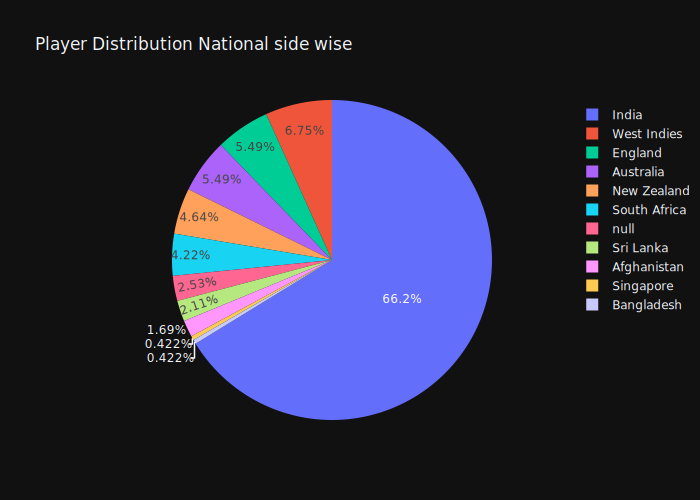

In [63]:

fig = px.pie(ipl, names='National Side',title='Player Distribution National side wise ')
fig.update_layout(template='plotly_dark')
fig.show()


### Best Batsman pick in IPL

In [64]:
batsman = ipl[ipl['Type'] == 'Batsman']

In [65]:
best_pick_batsman = batsman[(batsman['ValueinCR'] < 8 ) & (batsman['BattingAVG'] > 30 ) & (batsman['BattingS/R'] >= 130)]

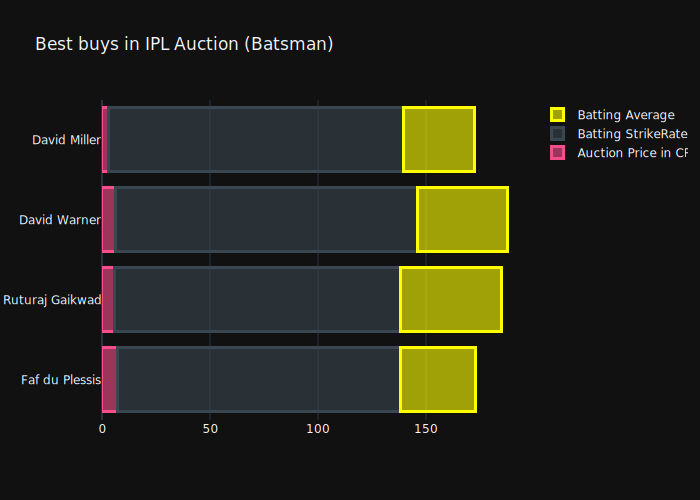

In [66]:
fig = go.Figure()

fig.add_trace(go.Bar(
    y=best_pick_batsman['Name'],
    x=best_pick_batsman['ValueinCR'],
    orientation='h',
    name = 'Auction Price in CR',
    marker=dict(
        color='rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
    )
))
fig.add_trace(go.Bar(
    y=best_pick_batsman['Name'],
    x=best_pick_batsman['BattingS/R'],
    orientation='h',
    name = 'Batting StrikeRate',
    marker=dict(
        color='rgba(58, 71, 80, 0.6)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=3)
    )
))

fig.add_trace(go.Bar(
    y=best_pick_batsman['Name'],
    x=best_pick_batsman['BattingAVG'],
    orientation='h',
    name = 'Batting Average',
    marker=dict(
        color='rgba(255,255,0, 0.6)',
        line=dict(color='rgba(255,255,0, 1.0)', width=3)
    )
))

fig.update_layout(barmode='stack',template='plotly_dark',title='Best buys in IPL Auction (Batsman)')
fig.show()


### Best Bowler pick in IPL

In [67]:
bowler = ipl[ipl['Type'] == 'Bowler']
bowler.dropna(inplace=True)
x = [x for x in range(len(bowler))]
bowler = bowler.set_index(pd.Index(x))
for i in range(len(bowler.Bowling)):
    bowler.Bowling[i]= bowler.Bowling[i].title()
    bowler.Bowling[i] = re.sub('[^A-Za-z0-9]+', '', bowler.Bowling[i])

/home/mehul/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_38809/4290944146.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_38809/4290944146.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [68]:
bowler.Bowling.unique()

array(['RightArmFast', 'LegBreakGoogly', 'LeftArmMediumFast',
       'RightArmMedium', 'RightArmMediumFast', 'LegBreak',
       'SlowLeftArmOrthodox', 'LeftArmFastMedium', 'LeftArmFast',
       'LeftArmMedium', 'RightArmFastMedium', 'SlowLeftArmChinaman'],
      dtype=object)

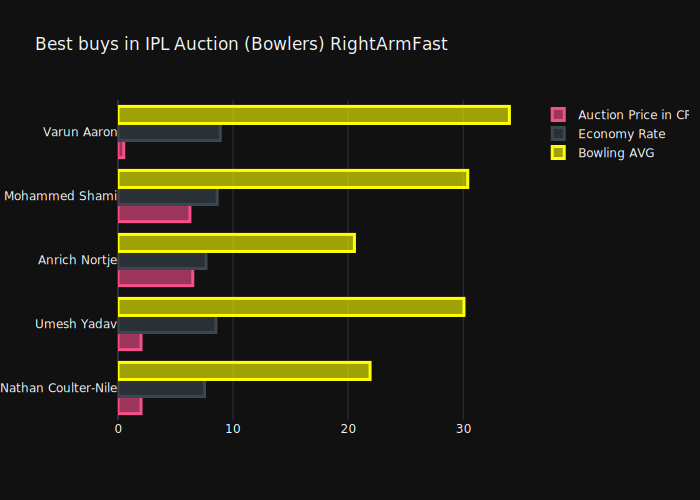

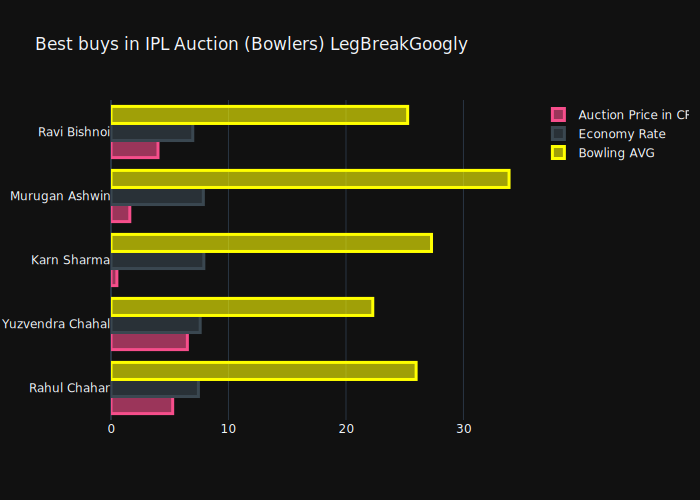

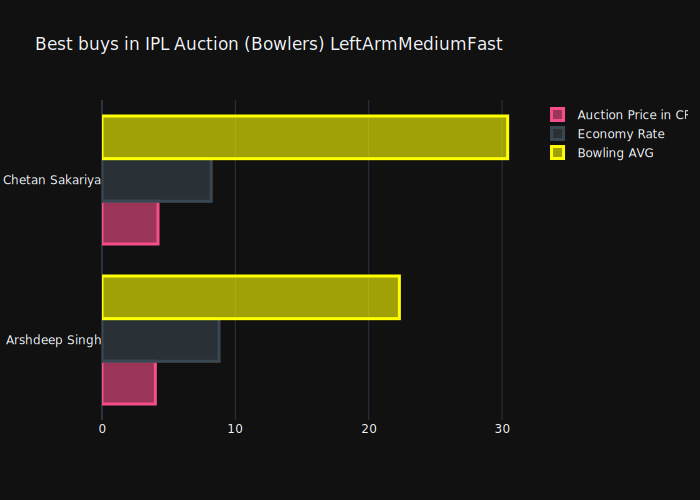

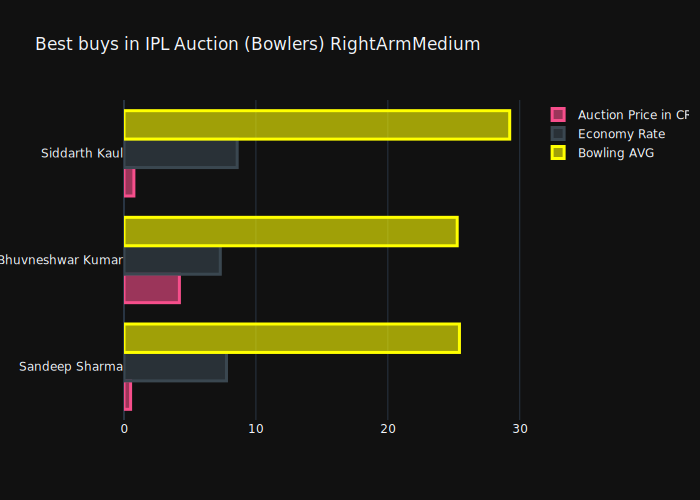

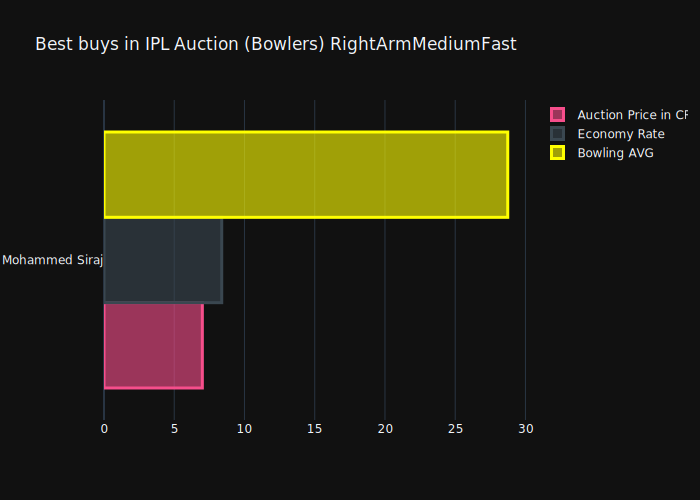

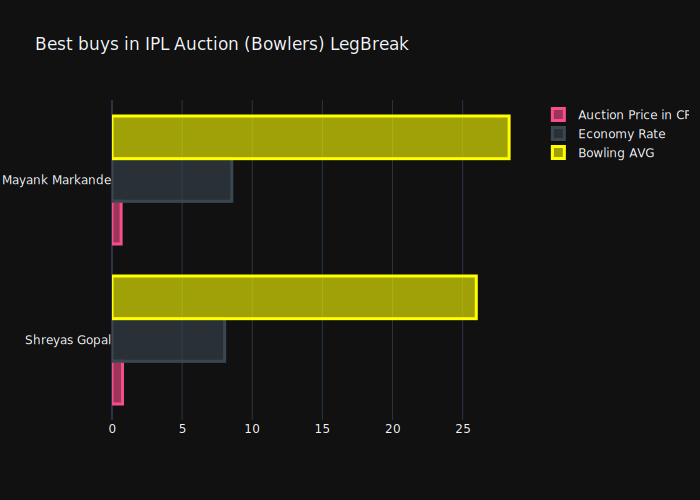

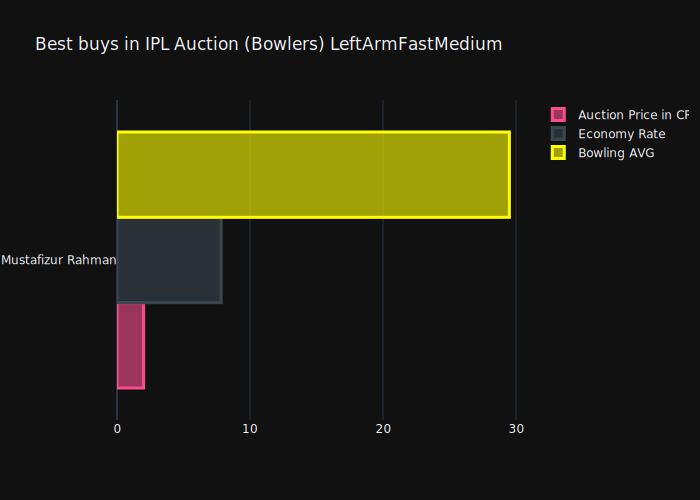

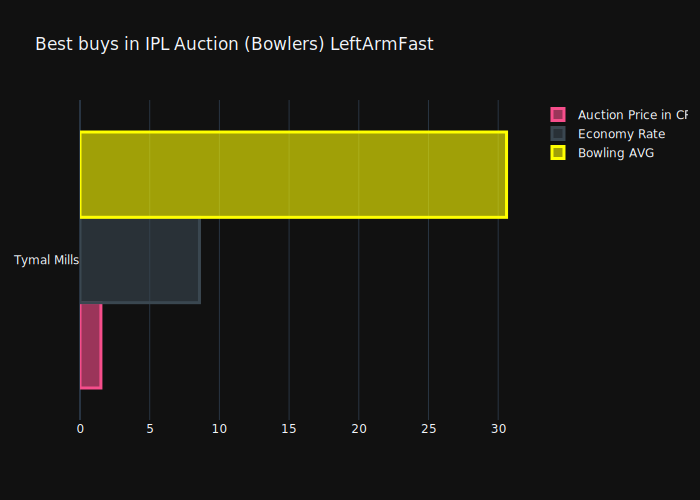

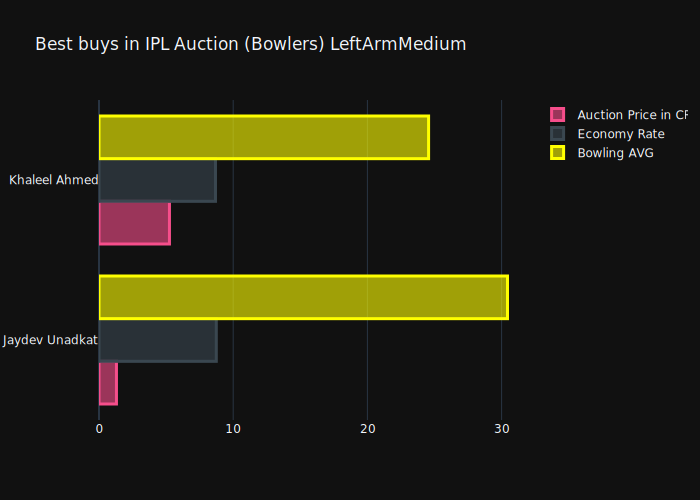

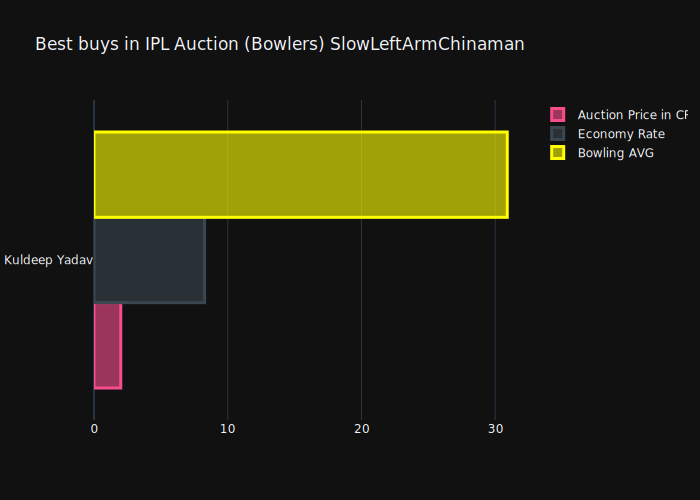

In [69]:
for type in bowler.Bowling.unique():
    best_bowler = bowler[(bowler['ValueinCR'] <= 7) & (bowler['Bowling'] == type) & (bowler['BowlingAVG'] <= 35) & (bowler['EconomyRate'] <= 9)]

    if(len(best_bowler) !=0):
        fig = go.Figure()

        fig.add_trace(go.Bar(
            y=best_bowler['Name'],
            x=best_bowler['ValueinCR'],
            orientation='h',
            name = 'Auction Price in CR',
            marker=dict(
                color='rgba(246, 78, 139, 0.6)',
                line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
            )
        ))

        fig.add_trace(go.Bar(
            y=best_bowler['Name'],
            x=best_bowler['EconomyRate'],
            orientation='h',
            name = 'Economy Rate',
            marker=dict(
            color='rgba(58, 71, 80, 0.6)',
            line=dict(color='rgba(58, 71, 80, 1.0)', width=3)
        )

        ))

        fig.add_trace(go.Bar(
            y=best_bowler['Name'],
            x=best_bowler['BowlingAVG'],
            orientation='h',
            name = 'Bowling AVG',
            marker=dict(
            color='rgba(255,255,0, 0.6)',
            line=dict(color='rgba(255,255,0, 1.0)', width=3)
        )
        ))



        fig.update_layout(template='plotly_dark',title=f'Best buys in IPL Auction (Bowlers) {type}')
        fig.show()




### Best Allrounder pick in IPL

In [70]:
best_allrounder = ipl[(ipl['Type'] == 'AllRounder') &(ipl['ValueinCR'] <=10)&(ipl['BattingAVG'] >= 25) & (ipl['BattingS/R'] >= 130) & (ipl['EconomyRate'] <= 10)]

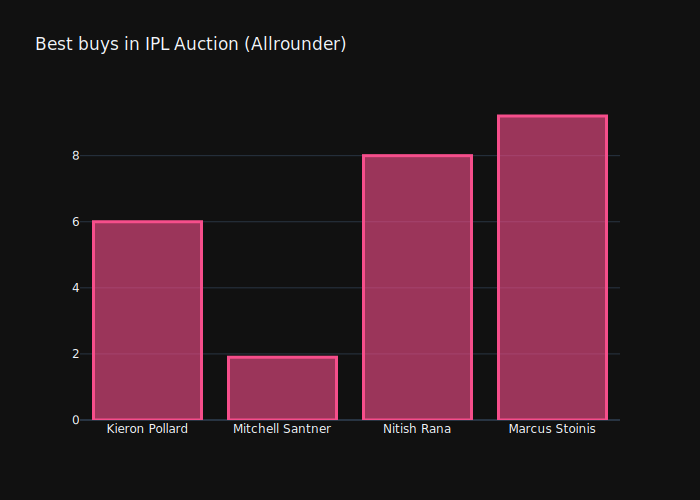

In [71]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=best_allrounder['Name'],
    y=best_allrounder['ValueinCR'],
    orientation='v',
    name = 'Auction Price in CR',
    marker=dict(
        color='rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
    )
))


fig.update_layout(template='plotly_dark',title=f'Best buys in IPL Auction (Allrounder)')

fig.show()


### Best Youngster pick in IPl

In [72]:
for i in range(len(ipl.Age)):
    if not(pd.isnull(ipl.Age[i])):
        ipl.Age[i] = int(ipl.Age[i][:2])

/tmp/ipykernel_38809/3338731195.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [73]:
best_ygBt = ipl[(ipl['Age'] <= 25) & (ipl['Type'] == 'Batsman') & (ipl['BattingAVG'] >= 25) & (ipl['BattingS/R'] >= 120)]
best_ygBw = ipl[(ipl['Age'] <= 25) & (ipl['Type'] == 'Bowler') & (ipl['EconomyRate'] <= 8)]
best_ygAll = ipl[(ipl['Age'] <= 25) & (ipl['Type'] == 'AllRounder')  & (ipl['BattingS/R'] >= 120)& (ipl['EconomyRate'] <= 10)]

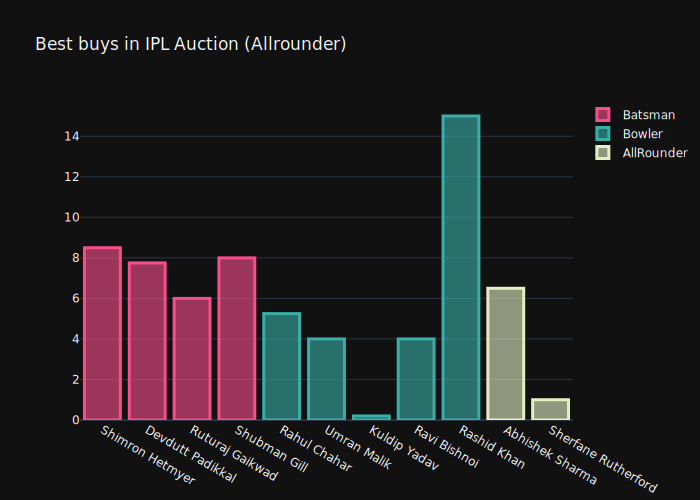

In [74]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=best_ygBt['Name'],
    y=best_ygBt['ValueinCR'],
    orientation='v',
    name = 'Batsman',
    marker=dict(
        color='rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
    )
))

fig.add_trace(go.Bar(
    x=best_ygBw['Name'],
    y=best_ygBw['ValueinCR'],
    orientation='v',
    name = 'Bowler',
    marker=dict(
        color='rgba(57, 174, 169,0.6)',
        line=dict(color='rgba(57, 174, 169, 1.0)', width=3)
    )
))

fig.add_trace(go.Bar(
    x=best_ygAll['Name'],
    y=best_ygAll['ValueinCR'],
    orientation='v',
    name = 'AllRounder',
    marker=dict(
        color='rgba(229, 239, 193, 0.6)',
        line=dict(color='rgba(229, 239, 193, 1.0)', width=3)
    )
))



fig.update_layout(template='plotly_dark',title=f'Best buys in IPL Auction (Allrounder)')
fig.show()
